In [2]:
#Install Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk

import re
import string
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
consumer_key = "RkOQAG4BSqN3uw9igM9VD4eU6"
consumer_key_secret = "YhjjGoJkHK6KqMxHOyrkyWIq9N7SH"
access_token = "1501013222526263297-3F6GBennQ"
access_token_secret = "5V1idbAmeY9HWsP"

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_key_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [ ]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole)

keyword = input("Please enter keyword or hashtag to search: ")
no_of_tweet = int(input ("Please enter how many tweets to analyze:"))

tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(no_of_tweet)
positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []



In [7]:
for tweet in tweets:
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score["neg"]
    neu = score["neu"]
    pos = score["pos"]
    comp = score["compound"]
    polarity += analysis.sentiment.polarity
 
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1
    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, no_of_tweet)
negative = percentage(negative, no_of_tweet)
neutral = percentage(neutral, no_of_tweet)
polarity = percentage(polarity, no_of_tweet)
positive = format(positive, ".1f")
negative = format(negative, ".1f")
neutral = format(neutral, ".1f")

#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  1000
positive number:  182
negative number:  516
neutral number:  302


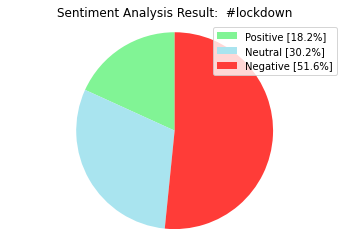

In [8]:
#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ["#81F495","#A9E4EF","#FF3C38"]
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result:  #"+keyword+"" )
plt.axis('equal')
plt.show()

In [9]:
tweet_list.drop_duplicates(inplace = True)
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list
#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(15)

,0,text
0,RT @EmekaGift100: Aba is on total lockdown\n#F...,aba is on total lockdown freennamdikanu fr...
1,RT @NymOfNySar: demonised that boy for having ...,demonised that boy for having a meal and drin...
2,RT @noitre32: @matteosalvinimi Contrario ma da...,contrario ma dai la fiducia al governo per ...
4,RT @simunch1: @GOV2UK Which crime? lockdown pa...,which crime lockdown parties delayed lock...
5,@HeroMotoCorp Already Informed it’s fail down ...,already informed it s fail down due to lockd...
7,RT @Rob_Kimbell: The British govenment should ...,the british govenment should pass a law makin...
8,"RT @Rconstantino: O ""pai da vacina"", o ""homem ...",o pai da vacina o homem da ci ncia o re...
9,RT @BareReality: We should call the ‘cost of l...,we should call the cost of living crisis wh...
10,"RT @helen_spirit1: Dear Lefties, many people h...",dear lefties many people have admitted they ...
12,RT @BabakRezaee: Excited to share that my most...,excited to share that my most recent publicat...


In [10]:
#Calculating Negative, Positive, Neutral and Compound values
tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @EmekaGift100: Aba is on total lockdown\n#F...,aba is on total lockdown freennamdikanu fr...,0.000000,0.750000,neutral,0.000,1.000,0.000,0.0000
1,RT @NymOfNySar: demonised that boy for having ...,demonised that boy for having a meal and drin...,-0.012500,0.000000,positive,0.000,0.866,0.134,0.4767
2,RT @noitre32: @matteosalvinimi Contrario ma da...,contrario ma dai la fiducia al governo per ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
4,RT @simunch1: @GOV2UK Which crime? lockdown pa...,which crime lockdown parties delayed lock...,-0.700000,0.800000,negative,0.485,0.426,0.089,-0.9022
5,@HeroMotoCorp Already Informed it’s fail down ...,already informed it s fail down due to lockd...,-0.195139,0.253472,negative,0.171,0.829,0.000,-0.5423
7,RT @Rob_Kimbell: The British govenment should ...,the british govenment should pass a law makin...,-0.250000,0.250000,negative,0.148,0.738,0.115,-0.2023
8,"RT @Rconstantino: O ""pai da vacina"", o ""homem ...",o pai da vacina o homem da ci ncia o re...,0.000000,0.000000,negative,0.099,0.901,0.000,-0.2960
9,RT @BareReality: We should call the ‘cost of l...,we should call the cost of living crisis wh...,0.000000,0.000000,negative,0.369,0.631,0.000,-0.8481
10,"RT @helen_spirit1: Dear Lefties, many people h...",dear lefties many people have admitted they ...,0.500000,0.500000,positive,0.000,0.702,0.298,0.7003
12,RT @BabakRezaee: Excited to share that my most...,excited to share that my most recent publicat...,0.227083,0.391667,positive,0.000,0.777,0.223,0.5574


In [11]:
#Creating new data frames for all sentiments (positive, negative and neutral)
tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]
#Function for count_values_in single columns
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])
#Count_values for sentiment
pc = count_values_in_column(tw_list,"sentiment")
pc


,Total,Percentage
neutral,161,36.10
negative,144,32.29
positive,141,31.61


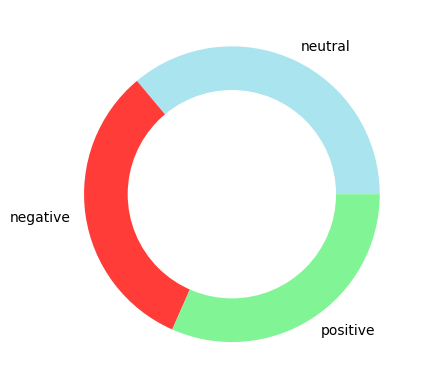

In [12]:
# Create data for Pie Chart
piechart = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors = ["#A9E4EF","#FF3C38","#81F495"])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

Word Cloud Saved Successfully


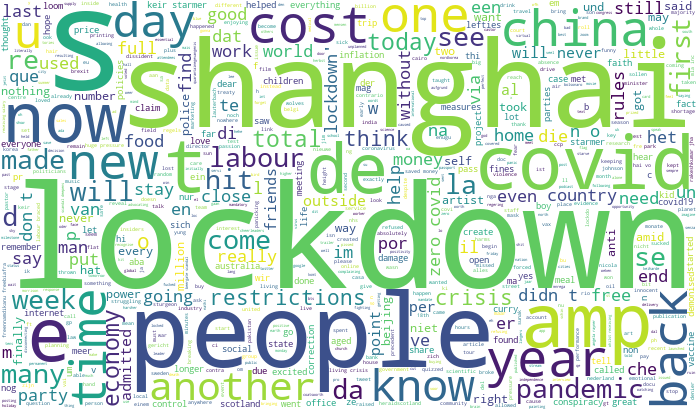

In [15]:
def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=5000,
                  stopwords=stopwords,
                  repeat=True)
    
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))
    
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

Word Cloud Saved Successfully


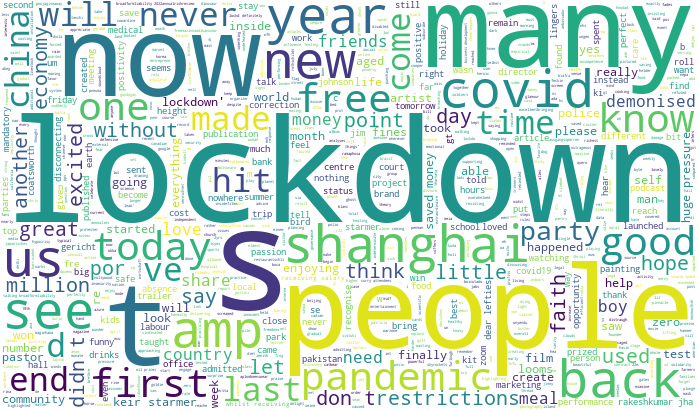

In [16]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

Word Cloud Saved Successfully


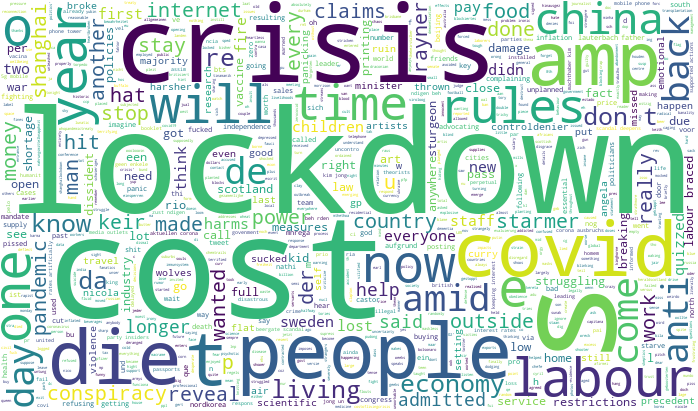

In [17]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

Word Cloud Saved Successfully


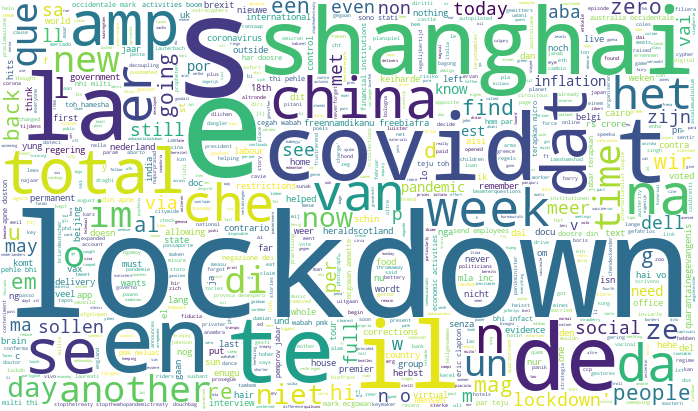

In [18]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)